In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score , KFold
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
import numpy as np

null_or_na = {}
for i in data.keys():
    null_or_na[i] = data[i].map(lambda x : (x == '') or (x==' ') or pd.isna(x) or pd.isnull(x))
null_or_na

{'Pregnancies': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 763    False
 764    False
 765    False
 766    False
 767    False
 Name: Pregnancies, Length: 768, dtype: bool,
 'Glucose': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 763    False
 764    False
 765    False
 766    False
 767    False
 Name: Glucose, Length: 768, dtype: bool,
 'BloodPressure': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 763    False
 764    False
 765    False
 766    False
 767    False
 Name: BloodPressure, Length: 768, dtype: bool,
 'SkinThickness': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 763    False
 764    False
 765    False
 766    False
 767    False
 Name: SkinThickness, Length: 768, dtype: bool,
 'Insulin': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 763    False
 764    False
 765    False
 76

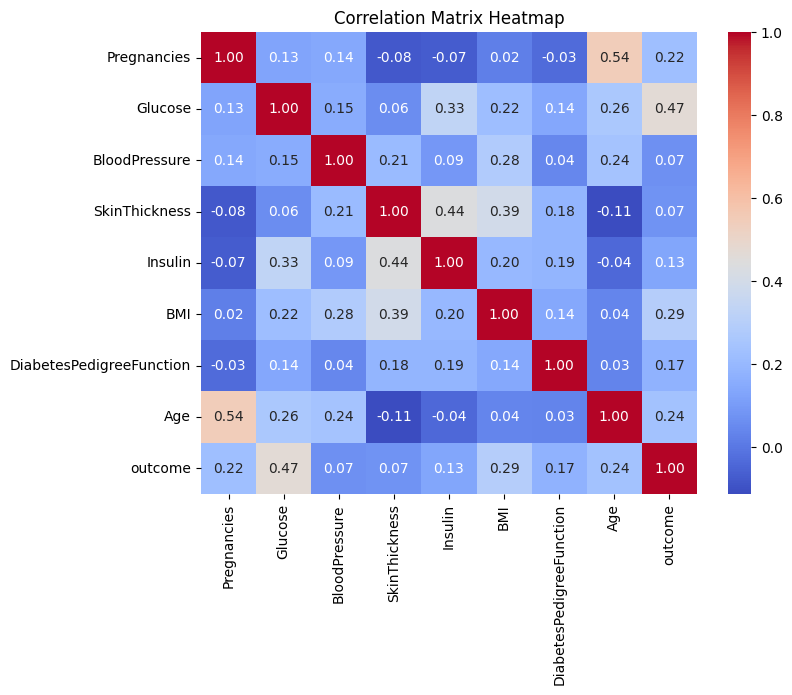

In [17]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
non_dup = data.drop_duplicates()
X_data = non_dup.drop(columns=['outcome'])
Y_data = non_dup['outcome']
Y_data

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

In [10]:
X_data_train , X_data_test , Y_data_train , Y_data_test = train_test_split(X_data,Y_data,shuffle=True,random_state=42)

In [13]:
log_model = LogisticRegression(penalty='l2', C=1.0,)

In [14]:
folds = KFold(n_splits=5)
cross_score = cross_val_score(log_model,X_data_train,Y_data_train,cv=folds)
for i, result in enumerate(cross_score, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_score.mean()* 100:.2f}%')

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

  Fold 1: 83.62%
  Fold 2: 77.39%
  Fold 3: 78.26%
  Fold 4: 75.65%
  Fold 5: 76.52%
Mean Accuracy: 78.29%


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
log_modeL_2 = LogisticRegression(penalty='l2',C=2.0,solver='lbfgs',max_iter=500)

In [33]:
log_modeL_2.fit(X_data_train,Y_data_train)

LogisticRegression(C=2.0, max_iter=500)

In [34]:
from sklearn.metrics import confusion_matrix , precision_score , recall_score 
acc = accuracy_score(Y_data_test,log_modeL_2.predict(X_data_test))
prec = precision_score(Y_data_test,log_modeL_2.predict(X_data_test))
rec = recall_score(Y_data_test,log_modeL_2.predict(X_data_test))
rec , prec , acc

(0.6521739130434783, 0.6164383561643836, 0.7291666666666666)

In [38]:
output = log_modeL_2.predict([[2,	197,	70	,45,	543 ,	30.5 ,	0.158,	53]])
output[0]

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1